# Data Exploration of PISA report: Relationships Between Student Performance, Socioeconomic Status and Internet Access

## by Alfredo Yigal Núñez Varillas

___________________

### Brief introduction to the PISA report

Having a good education is one of the most important factors for a person to fully develop their skills, be able to provide a better quality of life for themselves and their families, and contribute to the economic development of their community. This is well known by different governments worldwide, which is why more and more States are investing in knowing the educational level of their population, the results of their educational efforts and how to improve it. One of the reports that help this goal is the PISA report.

The PISA report, from the acronym Program for International Student Assessment, is an OECD program that measures the performance of 15-year-old students in three competencies of importance for their development in the adult world: reading, mathematics and natural sciences. This program is done every three years and allows the different governments to have comparable data in order to have a better knowledge of the performance of their students and improve their educational policies. The program started in the year 2000, participating 32 countries. Since then, the PISA study has grown to involve 65 economies worldwide for the 2012 report. 

The main objective of the PISA report is not to test the student's knowledge, but to measure their aptitudes and abilities relevant for an optimal development in the adult world. The study focuses on 15-year-old students as this is the age where compulsory education is commonly completed.


### Introduction to the PISA dataset

In this project, we will explore the data obtained in the PISA report of 2012. The database, which can be obtained [here](https://www.oecd.org/pisa/pisaproducts/pisa2012database-downloadabledata.htm), has information on 485490 students of 15 years from 65 countries worldwide. One of the most outstanding points of the PISA report is the amount of information that was collected. Not only basic data such as country, age and score was obtained; but rich and varied data, from quantity of books in the student's house, educational level of their parents, access to Internet, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read pisa2012.csv
# pisa_df = pd.read_csv('pisa2012.csv', encoding='windows-1252')
# print(pisa_df.shape)
# pisa_df.sample(3)

The dataset `pisa2012.csv` is interestingly large: there are 485490 rows per 636 columns. Due to these dimensions, it was considered better to have two separate notebooks: One for a basic Wrangling called "PISA Data Wrangling" and another for the data exploration (the current notebook).

In [3]:
# Import col types
col_dtype_series = pd.read_pickle("clean_pisa_cols.pkl")
col_dtype_dict = col_dtype_series.to_dict()

# read PISA data.
pisa_df = pd.read_csv('clean_pisa_data.csv', dtype = col_dtype_dict) 

In [4]:
print(pisa_df.shape)
print(pisa_df.columns)
pisa_df.sample(3)

(485490, 14)
Index(['student_id', 'gender', 'country', 'ESCS', 'science_score',
       'reading_score', 'math_score', 'immig_status', 'late_to_school',
       'skip_whole_school_day', 'skip_class_within_school', 'internet_home',
       'global_region', 'comb_score'],
      dtype='object')


,student_id,gender,country,ESCS,science_score,reading_score,math_score,immig_status,late_to_school,skip_whole_school_day,skip_class_within_school,internet_home,global_region,comb_score
295870,5011,Female,Korea,0.96,600.2797,554.5118,580.2384,Native,Never,Never,Never,"Yes, and I use it",Asia,1735.0299
113805,6563,Male,Chile,0.45,449.7762,470.4027,506.6288,Native,Three or Four Times,Never,Never,NaN,Latin America,1426.8077
69144,13879,Male,Brazil,0.55,508.8027,413.7854,487.0774,Native,One or Two Times,Never,Never,NaN,Latin America,1409.6655


### What is the structure of your dataset?

This DF has a total of 14 columns per 485490 rows. The data we can obtain range from personal and family information of the student, to data on the scores obtained, their access to the internet etc. 


### What is/are the main feature(s) of interest in your dataset?

In the Data Wrangling stage, I analyzed column by column of the original dataset and wrote down the following points of interest:

**Main point of interest:**

- Is there any relationship between students who arrive late, skip a class or miss a whole school day and a lower performance on the study?
- Is there any difference in results between students who have access to the internet and those who do not?
- Is there any relationship between the economic-socio-cultural level of students and their performance in the test?

**Other points of interest:**

- What are the differences between the results of boys and girls?
- Are there statistically significant differences between foreign students and local students?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Basically, all the columns of `clean_pisa_data.csv` will be used for our analysis, since we had to define points of interest from the beginning in order to filter the important columns from the hundreds of available columns in the `pisa2012.csv` file.

## Univariate Exploration

First, let's get an overview of the DF to analyze.

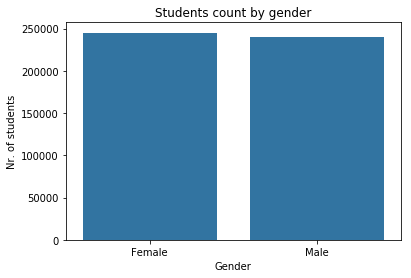

In [5]:
# Amount of boys and girls participating in the study

# Set a basic color for the visualizations
base_color = sb.color_palette()[0]

# Plot gender count
sb.countplot(data = pisa_df, x = 'gender', color=base_color)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Gender')
plt.title('Students count by gender');

Apparently, the number of boys and girls who took participated in the PISA study are almost equal, exceeding the number of girl by a small margin to that of boys.

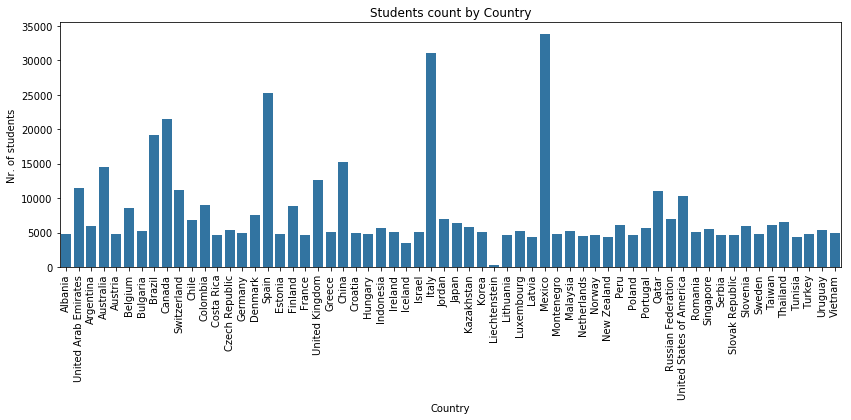

In [6]:
# Create a figure with appropriate proportions
plt.figure(figsize=[14, 4.5])

# Count students by country
sb.countplot(data = pisa_df, x = 'country', color = base_color)
plt.xticks(rotation = 90)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Country')
plt.title('Students count by Country');

In this graph, we can observe that almost 5000 students took this test for the vast majority of countries. Notable exceptional cases are those of Mexico, Italy, Spain, Canada and Brazil, where more than 20 thousand students took this test. At the other extreme, less than 500 students took this test in Liechtenstein. 

How can I be sure that the amount of mexican studients is actually correct?

In [7]:
pisa_df.query("country == 'Mexico'").shape[0]

33806

After a Google search '33806 Mexico PISA 2012', we find that the data is actually correct! We then can keep explorating the dataset.

Let's have a look at the distribution of the eco-social-cultural status of the studends.

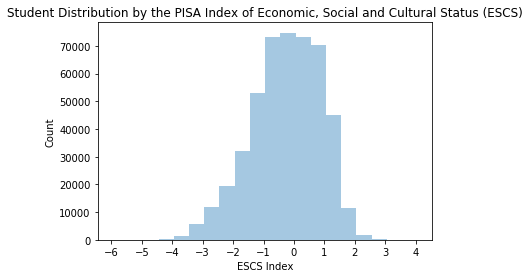

In [8]:
# Drop nan rows
eco_soc_cul_status_not_nan = pisa_df[~pisa_df.ESCS.isna()]

# Bins
bins = np.arange(pisa_df.ESCS.min(), pisa_df.ESCS.max() + 0.5, 0.5)

# Plot distribution
sb.distplot(eco_soc_cul_status_not_nan.ESCS, kde=False, bins=bins)

plt.xticks([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4])

# Set labels and title
plt.ylabel('Count')
plt.xlabel('ESCS Index')
plt.title('Student Distribution by the PISA Index of Economic, Social and Cultural Status (ESCS)');

In this graphic we can observe two important things:

1. The graph is left skewed, indicating that the majority of students are in the lower levels of the PISA index of economic, social and cultural status.

2. We can see that this graph has long, tiny side tails; indicating that although the absolute great majority of students are between levels -4 and 2 of the PISA index of economic, social and cultural status; there are also outliers that are not within this range.

To be able to see these outliers, we will change the scale of the y-axis.

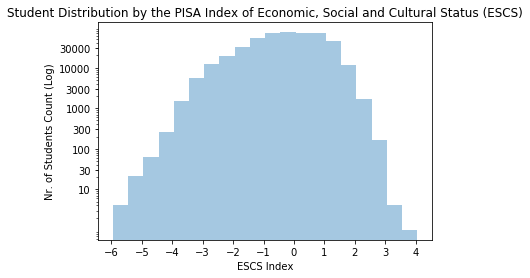

In [9]:
# Set y ticks to read chart easily
y_ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]

# Plot distribution with log scale Y
sb.distplot(eco_soc_cul_status_not_nan.ESCS, kde=False, bins=bins)

plt.xticks([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yscale('log')
plt.yticks(y_ticks, y_ticks);

# Set labels and title
plt.ylabel('Nr. of Students Count (Log)')
plt.xlabel('ESCS Index')
plt.title('Student Distribution by the PISA Index of Economic, Social and Cultural Status (ESCS)');

Having made this transformation we can see in the histogram represented students of all levels of the PISA index of economic, social and cultural status.

Let's see now the distribution of the scores for the different subjects evaluated in the PISA test.

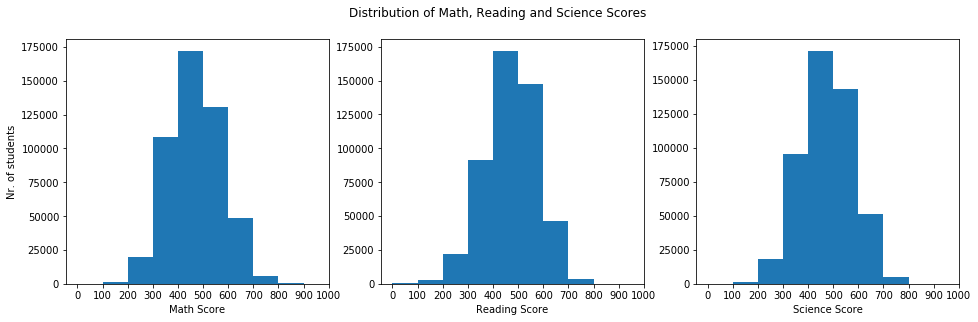

In [10]:
# Create a figure with appropriate proportions
fig, ax = plt.subplots(ncols=3, figsize = [16, 4.5])

scores_data = ['math_score', 'reading_score', 'science_score']
score_x_label = ['Math Score', 'Reading Score', 'Science Score']

y_ticks = np.arange(0, 200000, 25000)

# Iterate to create 3 charts
for i in range(len(scores_data)):
    score_data = scores_data[i]
    score_label = score_x_label[i]
    bins = np.arange(0, 1000, 100)
    ax[i].hist(data = pisa_df, x = score_data, bins=bins)
    ax[i].set_xlabel(score_label)
    ax[i].set_xticks(np.arange(0, max(pisa_df[score_data])+100, 100))
    ax[i].set_yticks(y_ticks)

# Set labels and title
ax[0].set_ylabel('Nr. of students')
fig.suptitle('Distribution of Math, Reading and Science Scores');

With the obtained graphics, we can see the following:

1. All graphics are unimodal, presenting their mode between 400 and 500.
2. For the three tests, the vast majority of students score between 300 and 600; although there are also much higher and much lower scores.

Let's explore the relative count of students who answered how many times they were late for school, or skipped a class or missed a day of school.

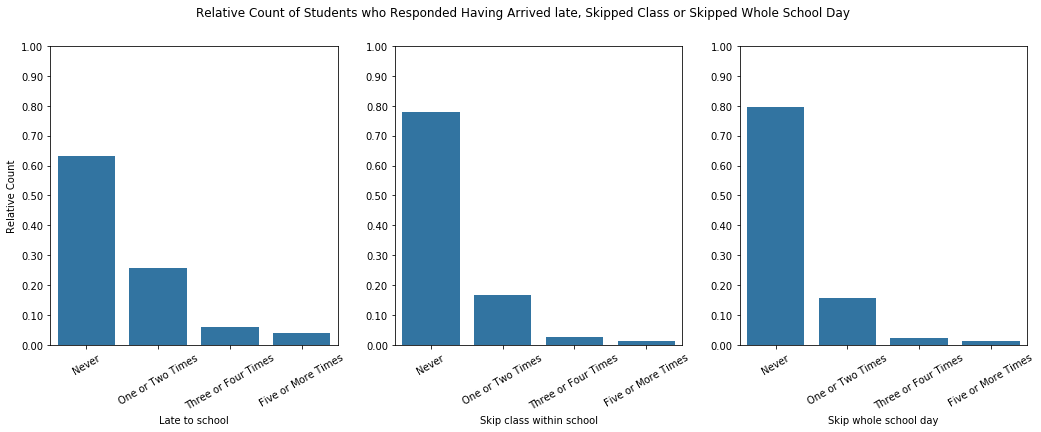

In [11]:
# Create a new figure
fig = plt.figure(figsize = [17.5, 5.5])
  
plt.ylabel('Relative Count')

# Iterate to create 3 charts in one figure
truancy_variables = ['late_to_school', 'skip_class_within_school', 'skip_whole_school_day']
trauncy_labels = ['Late to school', 'Skip class within school', 'Skip whole school day']

for i in range(len(truancy_variables)):
    plt.subplot(1, 3, i+1)
    trauncy_data = truancy_variables[i]
    sb.countplot(data = pisa_df, x = trauncy_data, color = base_color)
    plt.yticks(y_ticks)
    plt.xlabel(trauncy_labels[i])
    
    total_var_data = pisa_df[trauncy_data].shape[0]
    go_by = total_var_data/10
    
    ticks = np.arange(0, total_var_data + go_by, go_by)
    relative_ticks = np.arange(0, 1.1, 0.1)
    plt.ylim(0, total_var_data)
    
    relative_ticks = ['{:0.2f}'.format(relative_ytick) for relative_ytick in relative_ticks]
    
    plt.yticks(ticks, relative_ticks)
    plt.xticks(rotation=30)
    
    if i == 0:
        plt.ylabel('Relative Count')
    else:
        plt.ylabel('')
    

fig.suptitle('Relative Count of Students who Responded Having \
Arrived late, Skipped Class or Skipped Whole School Day');

We can observe that for the first graph "late to school count", the bar 'Never' is smaller than the 'Never' bars of the second and the third chart ("skip class within count", "skip whole school day count"). On the other hand, the second, third and fourth bars of the first chart are larger than the same bars for the second and third charts. This indicates that there are more students who accepted to have arrived late to classes than students who accepted that they skipped a class or missed a whole school day.


Now, let's see the count of students who answered about having (and using) the internet at home.

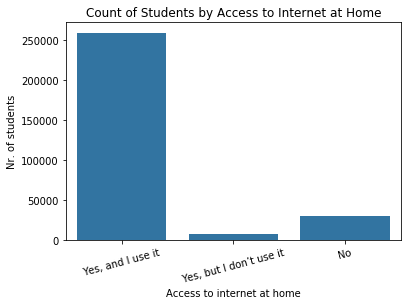

In [12]:
sb.countplot(data=pisa_df, x = 'internet_home', color = base_color)
plt.xticks(rotation=15)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Access to internet at home')
plt.title('Count of Students by Access to Internet at Home');

We can observe that more than 250 thousand students answered that they do have internet at home and use it, followed by less than 50 thousand students who answered that they do not have Internet at home and ending up with a small minority who say they have Internet at home but do not use it.

Finally, let's see the relative count of native, immigrants of first and second generation.

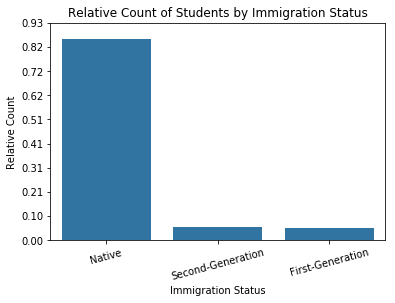

In [13]:
# Plot the relative frequency of natives, and immigrants of first and second generation
sb.countplot(data = pisa_df, x = 'immig_status', color = base_color, 
             order = pisa_df['immig_status'].value_counts().index);

# To get the relative frequency, we will simply convert the y ticks
total_immig_status_data = pisa_df.immig_status.shape[0]
yticks_in_chart = plt.yticks()[0]
relative_yticks = ['{:0.2f}'.format(relative_ytick) for relative_ytick in yticks_in_chart/total_immig_status_data]

# Modify x and y ticks
plt.yticks(yticks_in_chart, relative_yticks)
plt.xticks(rotation=15)

# Set title and labels
plt.ylabel('Relative Count')
plt.xlabel('Immigration Status')
plt.title('Relative Count of Students by Immigration Status');

In this graph we can see the relative count fo students by immigration status. As expected, the vast majority is Native, followed by second generation immigrants and finally first generation immigrants.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

So far, everything seems in order. I find it curious the number of students from Mexico who took this test, but this factor does not influence our analysis. I am eager to investigate about the influence of being late and missing classes. So far we have seen that more students agreed to have arrived late to class than those who accepted to have skipped a class or skipped a whole school day.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In this notebook, the only change I made was the scale of the Y axis of the distribution of the 'PISA index of economic, social and cultural status'; with the sole intention of being able to represent all the students in the distribution. The rest of the modifications to the original data were made in the 'PISA Data Wrangling' notebook, where I created two new columns: `comb_score`and `global_region`; modify the types of certain cols, change columns' name, etc.

## Bivariate Exploration

After having made an individual exploration of the variables of interest; let's see how they related to others.

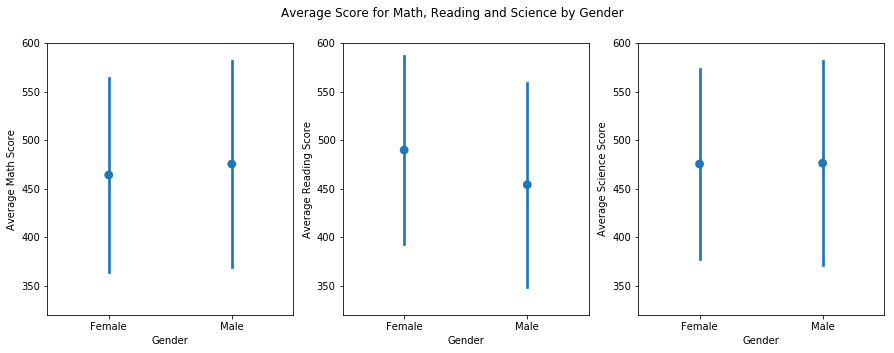

In [14]:
# Create a figure with appropriate proportions
fig = plt.figure(figsize = [15, 5])

scores = ['math_score', 'reading_score', 'science_score'] 
score_x_label = ['Average Math Score', 'Average Reading Score', 'Average Science Score']


# Iterate to create 3 charts in 1 figure
for i in range(len(scores)):
    score_label = score_x_label[i]
    plt.subplot(1, 3, i +1)
    sb.pointplot(data = pisa_df, x = 'gender', y = scores[i], ci = 'sd', linestyles='')
    plt.ylim(320, 600)
    plt.ylabel(score_label)
    plt.xlabel('Gender')
    
# Set title
fig.suptitle('Average Score for Math, Reading and Science by Gender');

From these graphs we can observe the following:
1. Boys have a slightly higher average score in math, but the difference they have with the girls' average math score is too small to be considered statistically significant.
2. It seems that in science, boys and girls are tied.
3. In reading, girls have a significantly higher average score than boys. We will see more about this in the following chart.


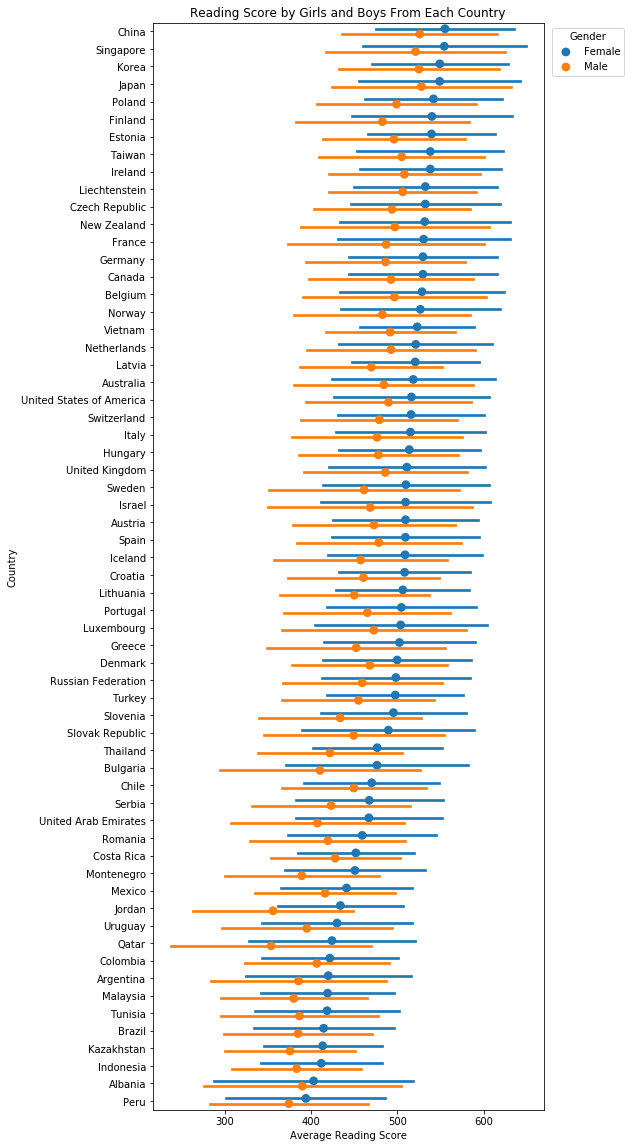

In [15]:
# Create figure
plt.figure(figsize = [7, 20])

# Order countries by girls' performance
read_score_order = pisa_df.query('gender == "Female"').groupby('country').mean().reading_score.sort_values(ascending=False).index

# Plot
sb.pointplot(data = pisa_df, y = 'country', x = 'reading_score', hue = "gender", ci='sd', linestyles="", dodge=0.3, order=read_score_order);

# Set title and labels
plt.ylabel('Country')
plt.xlabel('Average Reading Score')
plt.title('Reading Score by Girls and Boys From Each Country')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), title='Gender');

Amazing! In this chart, we can observe that girls have on average a higher reading score than boys in every country that participated in the 2012 PISA Report.

Let's move on and see if we can find a significant difference between natives, first generation and second generation immigrants.

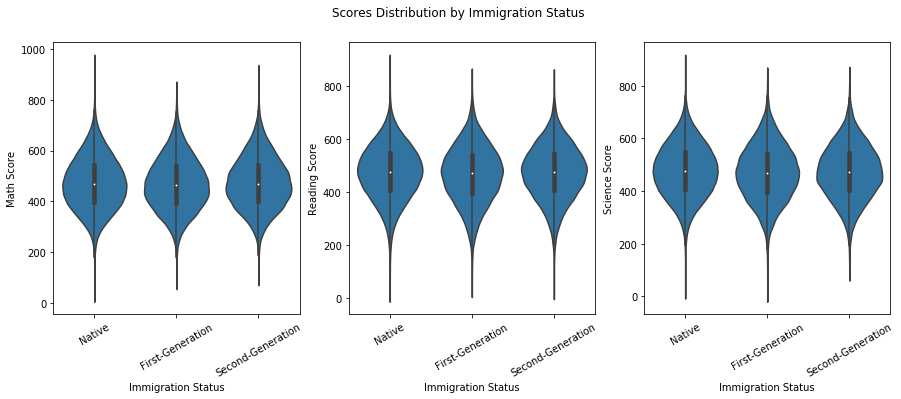

In [16]:
fig = plt.figure(figsize=[15, 5])

# Plot all charts
plt.subplot(1, 3, 1)
sb.violinplot(data = pisa_df, x = 'immig_status', y = 'math_score', linestyles="", dodge=0.3, color=base_color)
plt.xlabel("Immigration Status")
plt.ylabel("Math Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
sb.violinplot(data = pisa_df, x = 'immig_status', y = 'reading_score', linestyles="", dodge=0.3, color=base_color)
plt.xlabel("Immigration Status")
plt.ylabel("Reading Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
sb.violinplot(data = pisa_df, x = 'immig_status', y = 'science_score', linestyles="", dodge=0.3, color=base_color)
plt.xlabel("Immigration Status")
plt.ylabel("Science Score")
plt.xticks(rotation=30);

fig.suptitle('Scores Distribution by Immigration Status');

Apparently, at the global level, there is no notable difference between the results of native students, first-generation and second-generation immigrants...

Let's see now if we can find any relationship between the access and use of internet at home and the results in the different tests of the PISA Report.

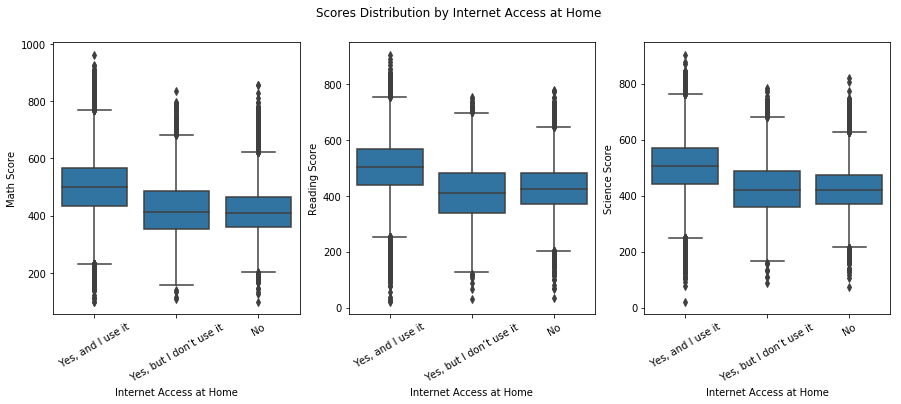

In [17]:
# Create Figure
fig = plt.figure(figsize=[15, 5])

# Plot all charts
plt.subplot(1, 3, 1)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'math_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Math Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'reading_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Reading Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'science_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Science Score")
plt.xticks(rotation=30)

fig.suptitle('Scores Distribution by Internet Access at Home');

From the three previous graphs, we can point out that on average, students who have access to the internet and use it had a higher performance in the three tests taken.

Let's continue looking for more factors that may affect the performance of students. What is the relationship between being late, skipping classes or skipping a whole school day with the scores obtained by the students?

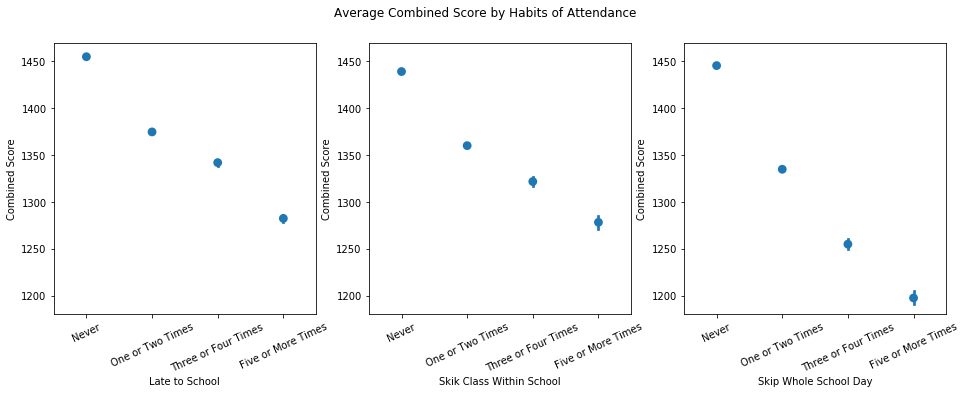

In [18]:
# New figure
fig=plt.figure(figsize = [16, 5])

trauncy_list = ['late_to_school', 'skip_class_within_school', 'skip_whole_school_day']
trauncy_labels = ['Late to School', 'Skik Class Within School', 'Skip Whole School Day']

graph_index = 1

# Iterate to create 3 charts
for trauncy in trauncy_list:
    plt.subplot(1, 3, graph_index)
    sb.pointplot(data=pisa_df, x = trauncy, y = 'comb_score', linestyles='')
    plt.xticks(rotation=25)
    plt.ylim(1180, 1470)
    plt.xlabel(trauncy_labels[graph_index-1])
    graph_index += 1
    plt.ylabel("Combined Score")

fig.suptitle('Average Combined Score by Habits of Attendance');

Here we find something completely interesting. The more times a student arrives late, skips a class or skips a day of school, the lower their performance on the tests. The behaviour that has the worse relationship with the score obtained is 'skip whole school day'. For example, while those students who claim to never have missed school have an average of 1450 points in the "combined score", students who claim to have missed 5 or more times have on average only 1200 points.

Finally, let's find out if there is a relationship between the immigration status of the student and their performance.

The variable `ESCS` that we have in the database is numeric. It would be good to have a categorical representation of this variable to make the analysis easier. For this, I will use `pd.cut` and create 5 economic-socio-cultural levels.

In [19]:
bins = (np.percentile(eco_soc_cul_status_not_nan.ESCS, 0), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 25), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 50), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 75),
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 100))

eco_socio_cultural_levels = ['4', '3', '2', '1']

pisa_df['ESC_Level'] = pd.cut(pisa_df['ESCS'], bins, labels=eco_socio_cultural_levels)

Having already defined this new variable, let's see what the combined score of each eco-socio-cultural level is.

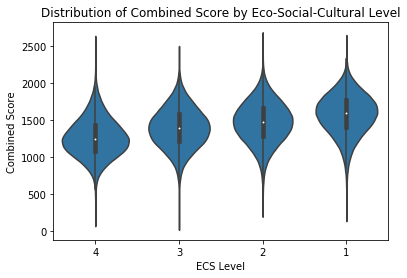

In [20]:
# Plot Chart
sb.violinplot(data = pisa_df, x = 'ESC_Level', y = 'comb_score', color=base_color)

# Set labels and title
plt.ylabel('Combined Score')
plt.xlabel('ECS Level')
plt.title('Distribution of Combined Score by Eco-Social-Cultural Level');

From all the information obtained in this phase, we can say that eco-socio-cultural level is related to student performance.

We also saw that not having access to the internet or incurring bad habits of attendance are also related to poor performance in the PISA study.

The question we ask ourselves now is the following: Will not these last two points be a consequence of a low eco-socio-cultural level and that this is really the true variable related to low student performance? In order to answer this question, we will have to see how lack of access to the internet and bad attendance habits are related to student performance for each of the eco-socio-cultural levels.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Regarding the features of interest, we have seen the following

1. Arriving late to class, skipping classes or skipping school is related to a lower performance on the part of students participating in the study. For all tests, the difference presented by the average of students who never missed classes is something more than 80 points.

2. The access and use of the internet seems to be related to the performance of students. On average, a student who has internet access at home and uses it has a higher score than those who do not have internet at home or those who do not use the internet they have available.

3. Finally, the different eco-socio-cultural levels show a relationship with the performance of students in the PISA report. The higher the eco-socio-cultural level, the higher the average in the performance of the three tests taken in the PISA report.


The first two points can be linked to the socio-economic level of the student. What if missing school or lack of access to the Internet is a consequence of the student's eco-socio-cultural reality and is this what really affects the student's performance? To be able to answer this, we will have to analyze for each eco-socio-cultural level the relation of absenteeism to class and the use of the internet with the performance of the student. Because of this, I made a new column `ESC_Level`, which is based on `ESCS`; but instead of being a numeric variable it is categorical.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. There doesn't seem to be a notable difference between the results obtained by boys and girls in math or science tests, but there is an interesting difference in the reading test: On average, girls obtained significantly higher scores than boys in reading tests. This pattern can be observed for every country, without exception.

2. At a global level, there doen't seem to be significant differences in the performance of students of different migratory status.